In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
upload = files.upload()

Saving Microsoft_Stock.csv to Microsoft_Stock.csv


In [ ]:
df = pd.read_csv('Microsoft_Stock.csv')
df

,Date,Open,High,Low,Close,Volume
0,4/1/2015 16:00:00,40.60,40.76,40.31,40.72,36865322
1,4/2/2015 16:00:00,40.66,40.74,40.12,40.29,37487476
2,4/6/2015 16:00:00,40.34,41.78,40.18,41.55,39223692
3,4/7/2015 16:00:00,41.61,41.91,41.31,41.53,28809375
4,4/8/2015 16:00:00,41.48,41.69,41.04,41.42,24753438
...,...,...,...,...,...,...
1506,3/25/2021 16:00:00,235.30,236.94,231.57,232.34,34061853
1507,3/26/2021 16:00:00,231.55,236.71,231.55,236.48,25479853
1508,3/29/2021 16:00:00,236.59,236.80,231.88,235.24,25227455
1509,3/30/2021 16:00:00,233.53,233.85,231.10,231.85,24792012


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Open    1511 non-null   float64
 2   High    1511 non-null   float64
 3   Low     1511 non-null   float64
 4   Close   1511 non-null   float64
 5   Volume  1511 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 71.0+ KB


In [ ]:
df.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
# prompt: menghapus kolom symbol, unnamed, adjhigh, adjclose, adjlow, adjopen, adjvolume, divcash, split factor
columns_to_drop = ['Open','High','Low','Volume']
df = df.drop(columns=columns_to_drop)
print(df.head())
print(df.info())


                 Date  Close
0 2015-04-01 16:00:00  40.72
1 2015-04-02 16:00:00  40.29
2 2015-04-06 16:00:00  41.55
3 2015-04-07 16:00:00  41.53
4 2015-04-08 16:00:00  41.42
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1511 non-null   datetime64[ns]
 1   Close   1511 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 23.7 KB
None


In [ ]:
df['Date'] = df['Date'].dt.strftime('%Y-%m-%d')
df

,Date,Close
0,2015-04-01,40.72
1,2015-04-02,40.29
2,2015-04-06,41.55
3,2015-04-07,41.53
4,2015-04-08,41.42
...,...,...
1506,2021-03-25,232.34
1507,2021-03-26,236.48
1508,2021-03-29,235.24
1509,2021-03-30,231.85


In [ ]:
df=df.sort_values(by="Date")
df

,Date,Close
0,2015-04-01,40.72
1,2015-04-02,40.29
2,2015-04-06,41.55
3,2015-04-07,41.53
4,2015-04-08,41.42
...,...,...
1506,2021-03-25,232.34
1507,2021-03-26,236.48
1508,2021-03-29,235.24
1509,2021-03-30,231.85


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1511 entries, 0 to 1510
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1511 non-null   object 
 1   Close   1511 non-null   float64
dtypes: float64(1), object(1)
memory usage: 23.7+ KB


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df=df.set_index("Date")
df

,Close
Date,
2015-04-01,40.72
2015-04-02,40.29
2015-04-06,41.55
2015-04-07,41.53
2015-04-08,41.42
...,...
2021-03-25,232.34
2021-03-26,236.48
2021-03-29,235.24


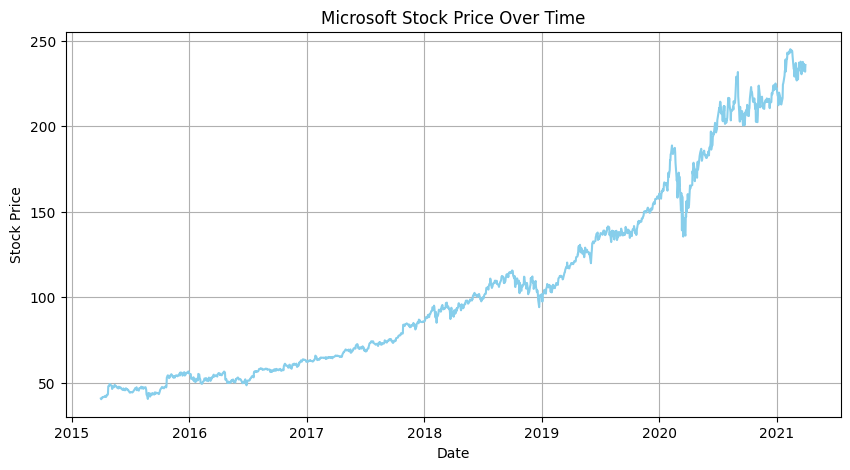

In [ ]:
# prompt: Plotting

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(df.index, df['Close'], color='skyblue')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Microsoft Stock Price Over Time')
plt.grid(True)
plt.show()


In [ ]:
training_set = df[:'2020'].iloc[:,0:1].values
test_set = df['2020':].iloc[:,0:1].values

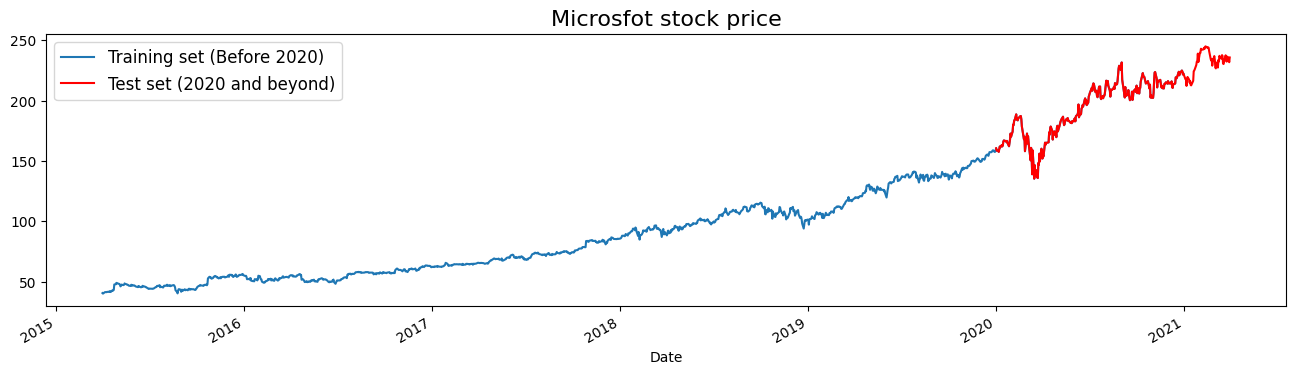

In [ ]:
df['Close'][:'2020'].plot(figsize=(16,4),legend=True)
df['Close']['2020':].plot(figsize=(16,4),legend=True, color = 'r')
plt.legend(['Training set (Before 2020)','Test set (2020 and beyond)'], fontsize=12)
plt.title('Microsfot stock price', fontsize=16)
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [ ]:
timesteps = 60

In [ ]:
X_train = []
y_train = []
for i in range(timesteps, len(training_set_scaled)):  # Use len() to get the size
    X_train.append(training_set_scaled[i-timesteps:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [ ]:
df_total = pd.concat((df['Close'][:'2020'], df['Close']['2020':]),axis=0)
inputs = df_total[len(df_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [ ]:
df_total

,Close
Date,
2015-04-01,40.72
2015-04-02,40.29
2015-04-06,41.55
2015-04-07,41.53
2015-04-08,41.42
...,...
2021-03-25,232.34
2021-03-26,236.48
2021-03-29,235.24


In [ ]:
X_test = []
for i in range(timesteps, len(inputs)):
    X_test.append(inputs[i-timesteps:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

In [ ]:
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers # Import layers from tensorflow.keras
#from keras.layers import LSTM, Dropout, Dense
from keras.layers import LSTM, Dropout, Dense

In [ ]:
Model = Sequential()
Model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1], 1)))
Model.add(LSTM(units=100, return_sequences=False))
Model.add(Dropout(0.2)) # layer dropout setelah layer LSTM keempat
Model.add(Dense(25)) #
Model.add(Dense(units=1))  # Output layer
Model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 60, 100)             │          40,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          80,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           2,525 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,751 (483.40 KB)

 Trainable params: 123,751 (483.40 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
Model.compile(optimizer= 'adam', loss = 'mean_squared_error', metrics =['accuracy'])

In [ ]:
epochs = 15
batch_size = 32

In [ ]:
history =  Model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 105ms/step - accuracy: 5.2131e-04 - loss: 0.0574
Epoch 2/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 4s 79ms/step - accuracy: 0.0024 - loss: 0.0016
Epoch 3/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 7.9478e-04 - loss: 0.0012
Epoch 4/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - accuracy: 0.0014 - loss: 9.5112e-04
Epoch 5/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 3s 79ms/step - accuracy: 0.0018 - loss: 8.8375e-04
Epoch 6/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - accuracy: 0.0013 - loss: 0.0011
Epoch 7/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 6.6423e-04 - loss: 0.0011
Epoch 8/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 86ms/step - accuracy: 1.3504e-04 - loss: 0.0010
Epoch 9/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 7s 137ms/step - accuracy: 4.8124e-05 - loss: 9.0970e-04
Epoch 10/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 80ms/step - accuracy: 1.3504e-04 - loss: 8.1333e-04
Epoch 11/15
44/44 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 6.2565e-04 - loss: 9.6616e-04
Epoch 12/1

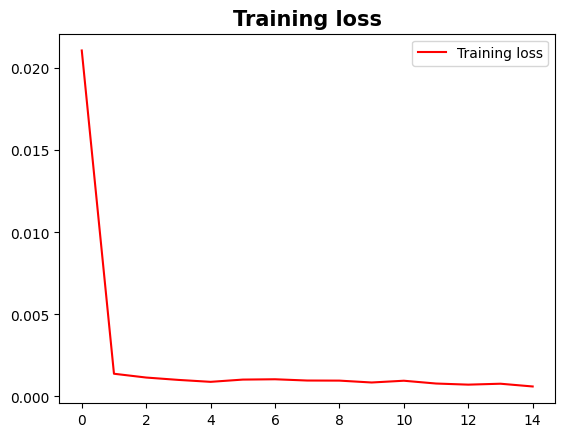

<Figure size 640x480 with 0 Axes>

In [ ]:
loss = history.history['loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')

plt.title('Training loss', size=15, weight='bold')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
predicted_stock_price = Model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step


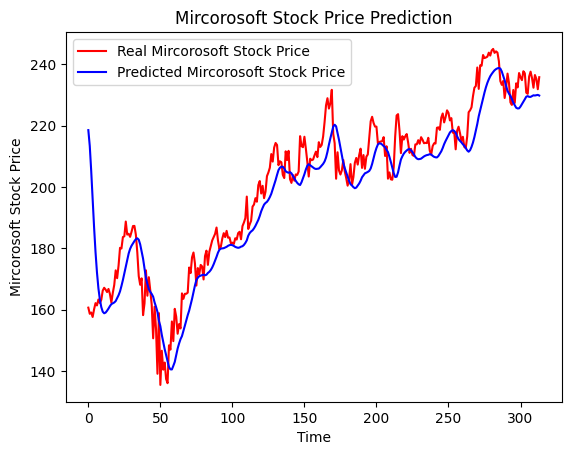

In [ ]:
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real Mircorosoft Stock Price')
    plt.plot(predicted, color='blue',label='Predicted Mircorosoft Stock Price')
    plt.title('Mircorosoft Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Mircorosoft Stock Price')
    plt.legend()
    plt.show()
plot_predictions(test_set, predicted_stock_price)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
mse = mean_squared_error(test_set, predicted_stock_price)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_set, predicted_stock_price)
r2 = r2_score(test_set, predicted_stock_price)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R-squared (R2): {r2:.4f}")


Mean Squared Error (MSE): 97.1521
Root Mean Squared Error (RMSE): 9.8566
Mean Absolute Error (MAE): 7.1968
R-squared (R2): 0.8568
